**<h1>Rotational Entropy</h1>**

**Albion Alushani, Queen Mary University of London, School of Physics and Chemistry**

## **Introduction**

For a solid state entropy can usually be separated into 3 different types of entropy. Vibrational entropy, rotational entropy and configurational entropy. They each have both distinct and the same properties. For example, thermal conductivity and phase stability are common properties of all three types of entropy whereas electrical polarisation is only a property of both configurational entropy and rotational entropy, the latter of which this report is focused on. Very rarely is rotational entropy a problem given the spherical symmetry of ions. However information about the contributions from rotational energy in a solid state are undeveloped. Below is the equation to calculate the rotational entropy for a given molecule: **[1]**

$$
S = Rln\left [ \left ( \frac{\pi ^{\frac{1}{2}}}{\sigma } \right )\prod_{j=1}^{3}\left ( \frac{8 \pi ^{2}I_jk_bT}{h^{2}} \right )^{\frac{1}{2}} \right ]
$$

Here I subscript j denotes the eigenvalues of a particular inertia matrix, or to be a little more percise the eigenvalues are the principle moments of inertia for an 'Inertia matrix'. Rotational entropy is a logarithmic function due to all particles having translational entropy but not all having rotational entropy. The sigma is the symmetry number which is the number of rotated positions that are not able to be identified as different from one another. The 'Inertia matrix' is found through a series of calculations revolving around the x,y and zcoordinates of each respective atom in the molecule. A simple python code to calculate the matrix and the rotational entropy for a given molecule is done below. 

## **Method**

We begin by importing the required python modules.

    import numpy as np
    import math
    from math import prod

Below are the required constants used in the caluclation for Rotational entropy and the Inertia matrix which includes the file itself. The 'amu' is the atomic mass unit in kg, the 'planck' is Planck's constant in m^2 Kg/s, the 'Ao' is the Angstrom in m, the 'T' is temperature set to 1 in Kelvin, 'Kb' is the Boltzmann constant in m^2 Kg s^-2 K^-1, 'R' is the gas constant in J K^-1 mol^-1 and the symmetry number sigma which varies for each molecule (12 in this case for Sulfate). 

    filename = 'sulfate.xyz'

    amu = 1.66053886e-27
    planck = 6.62606957e-34
    Ao = 1e-10
    T = 1
    Kb = 1.38e-23
    R = 8.31
    symmetry_number_sigma = 12

Below are some lists that will prove useful for later on. These include all the coordinates extracted from the file as well as the number of atoms in the molecule also extracted from the file.

    No_of_Atoms = []

    x_coordinates= []
    y_coordinates= []
    z_coordinates= []

The following opens the file, takes the title from the file and extracts the number of atoms from the file. The for loop loops through the file to extract the x,y and z coordinates of the atoms and appends them to their respective lists.

    file_open = open(filename)

    N_Atoms = int(file_open.readline())

    title = file_open.readline()

    for i in file_open:

        atom,x,y,z = i.split()
        No_of_Atoms.append(atom)

        x_coordinates.append(Ao*(float(x)))
        y_coordinates.append(Ao*(float(y)))
        z_coordinates.append(Ao*(float(z)))

    file_open.close()

Although not specifically required, it would be useful to print out the title (effectively the name of the molecule) as well as the coordinates and the number of atoms in the molecule.

    print("Molecule:  %s" % title)
    print('\n')
    print("number of atoms:  %d" % N_Atoms)
    print('\n')
    print("x-coordinates:  %s" % x_coordinates)
    print('\n')
    print("y-coordinates:  %s" % y_coordinates)
    print('\n')
    print("z-coordinates:  %s" % z_coordinates)
    print('\n')

The mass of the molecule was calculated using the number of atoms extracted from the file and multiplying it with the atomic mass unit constant (amu) defined earlier.

    mass = N_Atoms*amu
    print(mass)

To calculate the 'Inertia matrix' the elements of each matrix needs to be computed. To do this, the following equations were used:**[2]**


$$I_{xx} = \sum_{i} m_i\left ( {y_i}^{2} + {z_i}^{2} \right )$$
$$I_{yy} = \sum_{i} m_i\left ( {x_i}^{2} + {z_i}^{2} \right )$$
$$I_{zz} = \sum_{i} m_i\left ( {x_i}^{2} + {y_i}^{2} \right )$$
$$I_{xy} = \sum_{i} m_i\left ( {x_i}{y_i} \right )$$
$$I_{yz} = \sum_{i} m_i\left ( {y_i}{z_i} \right )$$
$$I_{xz} = \sum_{i} m_i\left ( {x_i}{z_i} \right )$$

Where each of these elements (in order) form the 'Inertia matrix'. For simplification the square of each of the coordinates in their respective arrayss were computed and stored into a new array as well as the products of the two lists (using 'zip') as demonstrated below. The 'Inertia matrix' was formed by creating a matrix of all these elements.


    x_squared = [xo ** 2 for xo in x_coordinates]
    y_squared = [yo ** 2 for yo in y_coordinates]
    z_squared = [zo ** 2 for zo in z_coordinates]

    xy = []
    yz = []
    xz = []

    for x1, y2 in zip(x_coordinates, y_coordinates):
        xy.append(x1 * y2)

    for y22, z1 in zip(y_coordinates, z_coordinates):
        yz.append(y22 * z1)

    for x11, z22 in zip(x_coordinates, z_coordinates):
        xz.append(x11 * z22)

    Ixx = mass * np.sum((y_squared + z_squared))
    Iyy = mass * np.sum((x_squared + z_squared))
    Izz = mass * np.sum((x_squared + y_squared))
    Ixy = -mass * np.sum(xy)
    Iyz = -mass * np.sum(yz)
    Ixz = -mass * np.sum(xz)

    I = np.array([[Ixx, Ixy, Ixz], [Ixy, Iyy, Iyz], [Ixz, Iyz, Izz]])
    print('\n')
    print(I)
    print('\n')

As discussed above the eigenvalues of this matrix happen to be the prinicple moment of inertia for the molecule.

    principle = np.linalg.eigvals(I)
    print(principle)
    print('\n')

To make this a little easier constants have been created from the rotational entropy equation. 

    c1 = ((np.pi)**0.5)/symmetry_number_sigma
    c2 = np.sqrt((8*((np.pi)**2)*Kb*T)/(planck**2))

    eigen_rooted = []
    for i in principle:
        eigen_rooted.append(np.sqrt(i))

Finally the line of code that calculates the rotational entropy directly.

    S = R*np.log(c1*c2*math.prod(eigen_rooted))
    
    print(f"Rotational Entropy = {S:.2f} per unit mass")
    print('\n')
    print("note: per unit mass has units J K^-1 Kg^-1")

## **Results**

**Sulfate**

<center>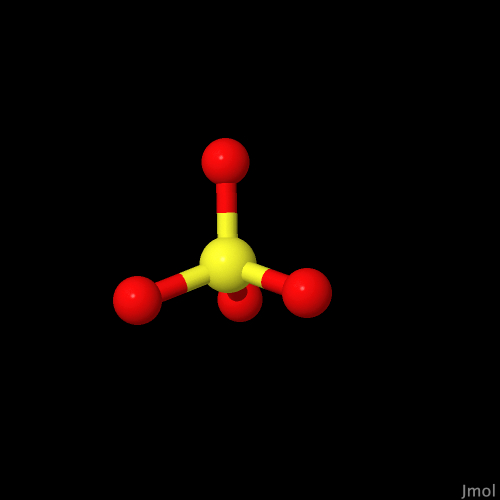</center>
<center><em>Sulfate structure</em></center>
<center><em>Jmol: an open-source Java viewer for chemical structures in 3D. http://www.jmol.org/</em></center>

Rotational Entropy for Sulfate: -843.71 J K^-1 Kg^-1

**Adamantane**

<center>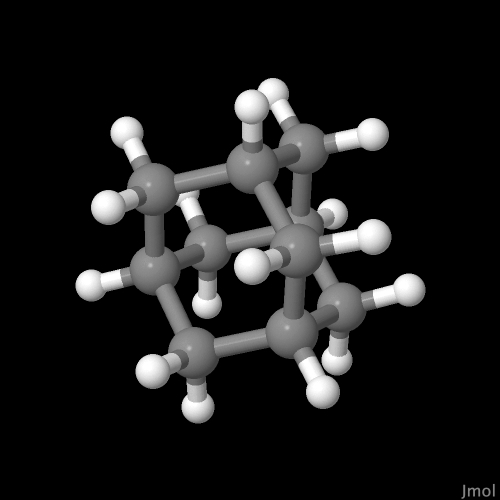</center>
<center><em>Adamantane structure</em></center>
<center><em>Jmol: an open-source Java viewer for chemical structures in 3D. http://www.jmol.org/</em></center>

Rotational Entropy for Adamantane: -783.96 J K^-1 Kg^-1

**Ammonium**

<center>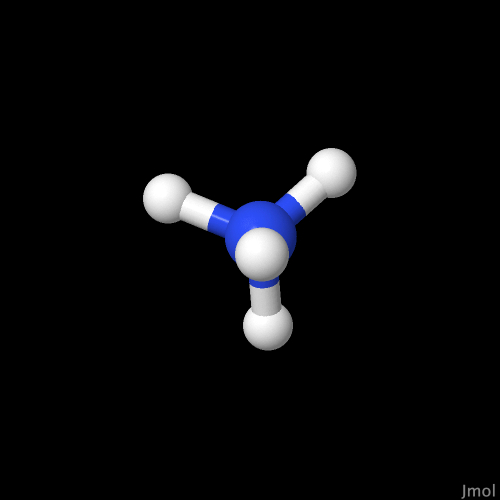</center>
<center><em>Ammonium structure</em></center>
<center><em>Jmol: an open-source Java viewer for chemical structures in 3D. http://www.jmol.org/</em></center>

Rotational Entropy for Ammonium: -842.98 J K^-1 Kg^-1

**Quinuclidinium**

<center>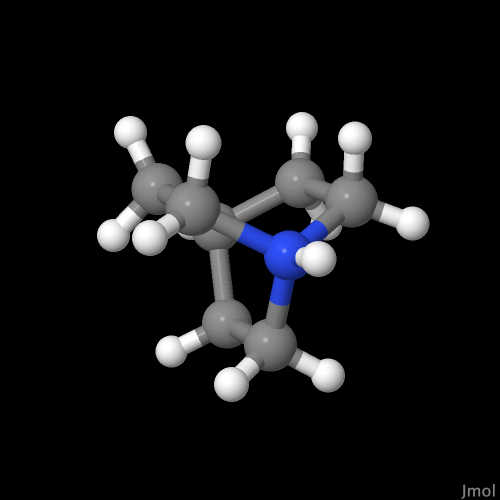</center>
<center><em>Quinuclidinium structure</em></center>
<center><em>Jmol: an open-source Java viewer for chemical structures in 3D. http://www.jmol.org/</em></center>

Rotational Entropy for Quinuclidinium: -798.54 J K^-1 Kg^-1

## **Discussion and Conclusion**

Since all the calculated entropy values are negative it leads me to believe that the atoms are less ordered. This could be due to the tempertaure in the equation as everything else is constant. I found that with Sulfate for example, if I changed the temperature to 10 Kelvin then the entropy would decrease (-834.14 J K^-1 Kg^-1) leading to the atoms being more disordered than at 1 Kelvin. It could be that the temperature rising causes the atoms to vibrate more leading to more 'waste' energy being converted to work which in turn decreases the entropy. Therefore it seems that temperature is the only variable that affects the rotational entropy of a molecule. There was no correlation between the number of atoms and the rotational entropy as well.

All the calculations and code of rotational entropy above are explicit calculations. However direct calculation would require a method of molecular dynamics in which you would need to be evaluate the statistics of rotations over a period of time. This can be time consuming and may likely require a large number of steps. But by applying biased molecular dynamics. This would see the molecule varied under a specific variable while making sure all the thermodynamic laws and integral aspects have been maintained. In this case and by observing the equation above the biased molecular dynamics method would see the molecules being analysed with varied temperatures to see the effects of the atoms over a given time. Machine learning could be used to determine the properties of the molecules' atoms and relate them to more complex systems.**[1]**

In conclusion, from what has been gathered the rotational entropy varies on temperature and that for these set of molecules all the rotational entropy is negative which in turn it was found that (albeit for a very singular case) increasing the temperature decreases the entropy which means the atoms are more disordered. Despite this only looking at rotational entropy, for a solid state system which may include vibrational and configurational entropy a more efficient code could be developed to see and compare these three entropy types.

## **References**

**[1]** <a> Butler et al. Organised chaos: entropy in hybrid inorganic– organic systems and other materials,Chem. Sci., 2016, 7, 6316   </a>

**[2]** <a  href="https://scipython.com/book2/chapter-6-numpy/problems/p65/the-moment-of-inertia-tensor/">, Hill 6.5.2, Last accessed on Sunday 23rd 2022 through Google. Subject to change  </a>

**[3]** <a  href="http://www.jmol.org/"> Jmol: an open-source Java viewer for chemical structures in 3D.    </a>